# 2 Introduction to machine learning

## 2.1 Data preprocessing

* Getting data from kaggle.com 
* data import
* DataFrame

## Download titanic data from kaggle: https://www.kaggle.com/c/titanic/data

In [1]:
!head train.csv

### Import and explore data

In [2]:
import pandas as pd
# open data
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Fit the data with our custom linear regression model

We will use the model that we implemented in the first part of the course:

In [3]:
from my_models import SimpleLinearRegression

In [4]:
SimpleLinearRegression

my_models.SimpleLinearRegression

In [5]:
df_train = df[['Age', 'Survived']]
df_train.dropna()

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0
...,...,...
885,39.0,0
886,27.0,0
887,19.0,1
889,26.0,1


In [6]:
m = SimpleLinearRegression(1., 1., 0.0001)
m.fit(df_train['Age'], df_train['Survived'])
m.b

0.9705055479791822

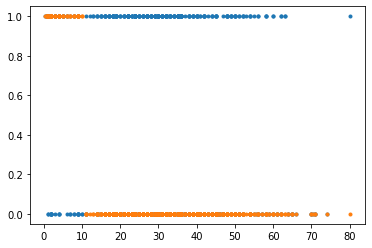

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(df_train['Age'], df_train['Survived'], '.')
y_pred = (m.predict(df_train['Age']) > 0.8) * 1
plt.plot(df_train['Age'], y_pred, '.')

In [8]:
(y_pred == df_train['Survived']).mean()

0.6296296296296297

The simple model achieves 62 % of accuracy.

**Question**: What is the chance level accuracy?

Chance level accuracy for binary predicition is 0.5 (two classes, 0, 1, equally probable). But due to the unbalanced distribution of the survivors (only ~30% survived), a dummy model that predicts always 0 (not survived), achieves the accuracy of 59%.

In [9]:
(df_train['Survived'] == 0).mean()

0.6161616161616161

**Exercise**: Try finding the column/threshold that gives the best prediction.

**Exercise**: Name all categorical and numerical columns in the titanic data frame.

**Exercise**: Count the number of rows with missing data.

## 2.2 Logistic regression

* scikit-learn library
* fit/transform methods

A better adapted models for classification is the logistic regression. We will use the implementation from scikit-learn package.

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model = LogisticRegression(C=1, solver='lbfgs')
df_train = df_train.dropna()
model.fit(df_train[['Age']], df_train['Survived'])

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
y_pred = model.predict(df_train[['Age']])
(y_pred == df_train['Survived']).mean()

0.5938375350140056

In [13]:
model.score(df_train[['Age']], df_train['Survived'])

0.5938375350140056

**Exercise**: Try calculating the precision metrics.

In [14]:
from sklearn.metrics import precision_score

In [15]:
y_true = df_train['Survived']
y_pred = model.predict(df_train[['Age']])

In [16]:
precision_score(y_true, y_pred)

/home/bartosz/.pyenv/versions/3.7.4/envs/centrale-data-science/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

Precision score is used for evaluating the performance of a model that was trained on an unbalanced dataset. From the documentation:

    The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
    true positives and ``fp`` the number of false positives. The precision is
    intuitively the ability of the classifier not to label as positive a sample
    that is negative.

In this case the precision is ill-defined because the model learned to predict 0 for all classes.

**Exercise**: Investigate the influence of the `C` parameter on the prediction.

### Multiple featues

To improve the prediction we will now use multiple regressors (features).

In [17]:
model = LogisticRegression(solver='lbfgs')
df_train = df[['Pclass', 'Age', 'Survived']].dropna()
X = df_train[['Pclass', 'Age']]
y = df_train['Survived']
model.fit(X, y)
model.score(X, y)


0.696078431372549

In [18]:
y_pred = model.predict(X)
precision_score(y, y_pred)

0.6607929515418502

The `X` array is a 2-dimensional array of features. Features are aranged along columns (one feature per column).

In [19]:
X.to_numpy()

array([[ 3., 22.],
       [ 1., 38.],
       [ 3., 26.],
       ...,
       [ 1., 19.],
       [ 1., 26.],
       [ 3., 32.]])

We can obtain the coefficients of the model

In [20]:
model.coef_

array([[-1.22653571, -0.04149665]])

**Exercise**: Use the `LinearRegression` class from scikit-learn  to fit the `a`, `b` and `c` coefficients of the following function:

`y = a * x1 + b * x2 + c`

where 

```
x1 = [1., 5., 2.]
x2 = [3., 4., 4.]
y  = [4.8, 13.3, 7.1]
```

In [21]:
import numpy as np

x1 = [1., 5., 2.]
x2 = [3., 4., 4.]
y  = [4.8, 13.3, 7.1]

X = np.array([x1, x2])
X = X.T

from sklearn.linear_model import LinearRegression

m = LinearRegression()
m.fit(X, y)

m.coef_

array([2.06666667, 0.23333333])

## 2.3 Cross-validation

* training, validation and tests sets
* validation splits

To measure the over fitting we need to split the data set into training and test datasets.

In [22]:
from sklearn.model_selection import train_test_split


df_train = df[['Pclass', 'Age', 'Survived']].dropna()
X = df_train[['Pclass', 'Age']]
y = df_train['Survived']


X_train, X_test, y_train, y_test = train_test_split(X, y)

In [23]:
len(y_test), len(y_train)

(179, 535)

In [24]:
m = LogisticRegression(C=100)
m.fit(X_train, y_train)
m.score(X_test, y_test)

/home/bartosz/.pyenv/versions/3.7.4/envs/centrale-data-science/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7094972067039106

# Extra content (not covered in the lecture)

## 2.4 Feature engineering

* one-hot encoding
* value imputation

scikit-learn models can be only trained on numerical features. To convert categorical features (such as `sex`) into numerical values, we can use one of the available encoders. The most common choice is the one-hot encoder.

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
df_clean = df[['Survived', 'Age', 'Pclass', 'Fare', 'Embarked', 'Sex']].dropna()

encoder = OneHotEncoder(sparse=False)
categorical = encoder.fit_transform(df_clean[['Embarked', 'Sex']])

others = df_clean[['Age', 'Pclass', 'Fare']]
target = df_clean['Survived']

features = np.hstack([others, categorical])

features.shape

(712, 8)

In [27]:
train_features, validation_features, train_target, validation_target = train_test_split(features, target)

lg = LogisticRegression()
lg.fit(train_features, train_target).score(validation_features, validation_target)

/home/bartosz/.pyenv/versions/3.7.4/envs/centrale-data-science/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7528089887640449

**Question**: The code above produces biased results (it over-estimates the accuracy). Can you tell why? 

## 2.5 Putting it all together

* pipelines

To avoid problems of the leakage from the training dataset to the test time prediciton, we should encapsulate all pre-processing steps and model training in a pipeline. 

In [28]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [29]:
df_clean = df[['Survived', 'Age', 'Pclass', 'Fare', 'Embarked', 'Sex', 'SibSp']].dropna()
target = df_clean['Survived']
features = df_clean.drop(columns=['Survived'])

In [30]:
transformer = ColumnTransformer(
  [('categorical', OneHotEncoder(), ['Sex', 'Embarked', 'Pclass']),
   ('numerical', StandardScaler(), ['Age', 'Fare'])], 
  remainder='passthrough')

estimator = make_pipeline(transformer, LogisticRegression())

In [31]:
train_features, validation_features, train_target, validation_target = train_test_split(features, target)

estimator.fit(train_features, train_target).score(validation_features, validation_target)

/home/bartosz/.pyenv/versions/3.7.4/envs/centrale-data-science/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7696629213483146

**Exercise**: Add imputation of missing values to the pipeline. Check out `sklearn.impute`.